Importing required libraries


```
# This is formatted as code
```



In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA COLLECTION AND PROCESSING


In [ ]:
#Loading the CSV data to Pandas Dataframe
import pandas as pd
gold_price_data = pd.read_csv("/content/gld_price_data.csv")
gold_price_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#SPX stands for the Standard & Poor's 500 Index.
#It is a stock market index that tracks the performance of 500 large publicly traded companies in the U.S.
#Why is SPX in a Gold Price Dataset?
#Gold prices and the stock market (SPX) often have an inverse relationship:

#When stock markets (SPX) rise, gold prices fall (investors prefer stocks).
#When stock markets (SPX) fall, gold prices rise (investors seek safe assets like gold).
#In a gold price dataset, "USO" typically refers to the United States Oil Fund (USO).

#What is USO?
#USO is an exchange-traded fund (ETF) that tracks the price of crude oil.
#It aims to reflect changes in the price of West Texas Intermediate (WTI) crude oil.
#Why is USO in a Gold Price Dataset?
#Gold and oil prices are often correlated because:

#Inflation Hedge: Rising oil prices can lead to inflation, increasing demand for gold as a hedge.
#Market Sentiment: Both gold and oil are commodities that react to global economic conditions.
#USD Influence: Since both are priced in U.S. dollars, fluctuations in the USD impact their prices.
#In a gold price dataset, EUR/USD refers to the exchange rate between the Euro (EUR) and the US Dollar (USD).

#Why is EUR/USD in a Gold Price Dataset?
#he EUR/USD exchange rate is important in gold price analysis because:

#Gold is Priced in USD:

#A stronger USD makes gold more expensive for foreign investors, leading to lower demand and lower prices.
#A weaker USD makes gold cheaper, increasing demand and raising prices.
#Euro’s Impact on the Dollar:

#If the Euro strengthens against the USD (EUR/USD rises), the USD weakens, making gold more attractive.
#If the Euro weakens against the USD (EUR/USD falls), the USD strengthens, often leading to lower gold prices.
#Global Market Sentiment:

#Investors often move money between currencies and commodities based on risk sentiment.
#A declining EUR/USD may signal a stronger USD, which can pressure gold prices.


In [ ]:
gold_price_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#no. of rows and column
gold_price_data.shape

(2290, 6)

In [ ]:
#getting some basic information
gold_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_price_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#statistics info
gold_price_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


CORRELATION


In [ ]:
#heatmap to understand correlation
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime
gold_price_data['Date'] = pd.to_datetime(gold_price_data['Date'])

# Select only numerical features for correlation
numerical_features = gold_price_data.select_dtypes(include=np.number)

plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

1. Positive Correlation
2. Negative correlation

<Axes: >

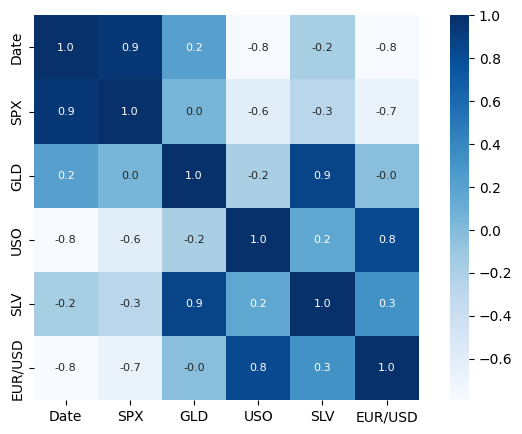

In [ ]:
#heatmap to understand correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
correlation = gold_price_data.corr()
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot_kws={'size':8},annot=True,cmap='Blues')

In [ ]:
#correlation values of gold
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-35-20136196530b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_price_data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

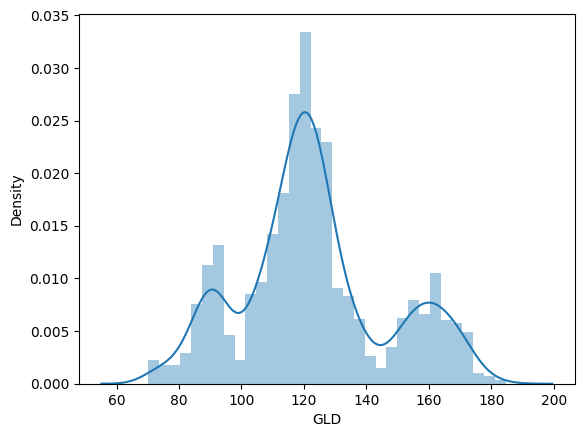

In [ ]:
#checking distribution of gold price
sns.distplot(gold_price_data['GLD'])

In [ ]:
#splitting the features and the tareget
X = gold_price_data.drop(["GLD", "Date"], axis=1)
Y = gold_price_data["GLD"]
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
#splitting into trainning data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

MODEL TRAINING - RANDOM FOREST REGRESSOR


In [ ]:
regressor = RandomForestRegressor(n_estimators = 200)

In [ ]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200)

MODEL EVALUATION


In [ ]:
#prediction on test data
gold_prediction_data = regressor.predict(X_test)

In [ ]:
print(gold_prediction_data)

[163.62164986 127.35144991 124.25499963 119.8473989  126.23629918
  85.12364811 171.81030162 136.31200032 106.59170073 132.91100178
 120.57274932 124.78570029 143.51224679 104.51219906  80.73074911
 120.74889994 141.0872494   90.73650072  91.59114922 128.19180266
 125.44540036 147.86440048 116.87175167 152.46364996 129.23574999
 129.54385071 118.18390105 111.42730048 168.82590158 157.99004955
 126.19130151 152.95790086 127.07365002 122.74164769 116.43210115
 154.47464979 114.90365013 120.51225154 104.17765219 106.40065041
 134.95769939  86.33784964 156.67280212 121.22815    122.34325099
 154.20795211 120.28884983 116.31234999 168.51150262 117.06850047
 138.12790177 161.52659863 158.40320036 153.14240187 124.27465
 117.24384999 167.37394996 117.32794937 165.63550086  84.15624984
 121.41434897 122.20935    119.97980032 172.01249839 119.03284993
 180.3188955  161.58555279 140.50525181 116.24244927  92.55975066
 171.9709995  117.88229979 117.01129936 125.80344975 146.73904955
  91.43395115

In [ ]:
# r squared error
error_score = metrics.r2_score(Y_test, gold_prediction_data)
print("R squared error : ", error_score)


R squared error :  0.9869532834657256


COMPARE ACTUAL AND PREDICTED VALUES

In [ ]:
Y_test = list(Y_test)

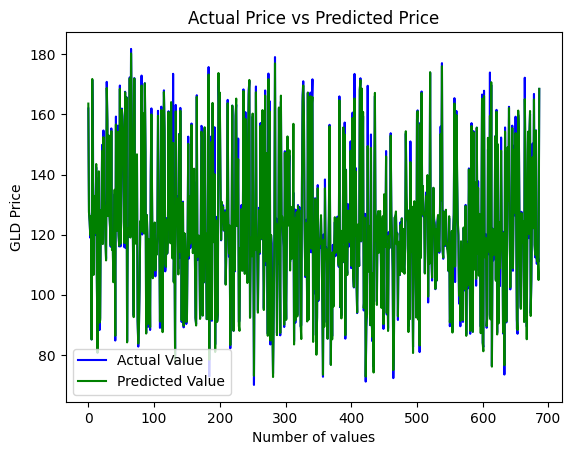

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(gold_prediction_data, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
# Save the trained model before trying to load it.
joblib.dump(regressor, "regressor.pkl")

# Now you can load the model.
model = joblib.load("regressor.pkl")  # Load the trained model

In [ ]:
import numpy as np

new_data = np.array([[8423.2,123.4,45.6,1.78]])  # Example input (must match feature count)
prediction = model.predict(new_data)
print("Predicted Output:", prediction)


Predicted Output: [149.99055288]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
!git config --global user.email "patidarseema641@gmail.com"
!git config --global user.name "seemapatidar17"


In [ ]:
!git clone https://github.com/your-username/your-repo.git
